In [4]:
import tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import keras.layers
import keras.models
import cv2
import os
import glob as gb



trainpath = r'C:\Users\Alisha\Desktop\inteldataset\seg_train'
testpath = r'C:\Users\Alisha\Desktop\inteldataset\seg_test'
predpath = r'C:\Users\Alisha\Desktop\inteldataset\seg_pred'



  



ModuleNotFoundError: No module named 'tf'

In [2]:
for folder in  os.listdir(trainpath + '\\seg_train\\') : 
    files = gb.glob(pathname= str( trainpath + '\\seg_train\\' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')








NameError: name 'os' is not defined

In [12]:
for folder in  os.listdir(testpath + '\\seg_test\\') : 
    files = gb.glob(pathname= str( testpath + '\\seg_test\\' + folder + '/*.jpg'))
    print(f'For test data , found {len(files)} in folder {folder}')







For test data , found 437 in folder buildings
For test data , found 474 in folder forest
For test data , found 553 in folder glacier
For test data , found 525 in folder mountain
For test data , found 510 in folder sea
For test data , found 501 in folder street


In [13]:
files = gb.glob(pathname = str( predpath + '\\seg_pred\\'+'/*.jpg'))
print(f'For prediction, found {len(files)} images')

For prediction, found 7301 images


In [14]:
code = { 'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5 }




def getcode(a):
     for image,label in code.items():
        if a == label:
            return image
print(code.items())

dict_items([('buildings', 0), ('forest', 1), ('glacier', 2), ('mountain', 3), ('sea', 4), ('street', 5)])


In [15]:
train_images = []
train_labels = []
for folder in os.listdir(trainpath + '\\seg_train\\'):
    files = gb.glob(pathname = str(trainpath + '\\seg_train\\' + folder + '/*.jpg'))
    for item in files:
        img = cv2.imread(item)
        img_to_array = cv2.resize(img, (150,150))
        train_images.append(list(img_to_array))
        train_labels.append(code[folder])


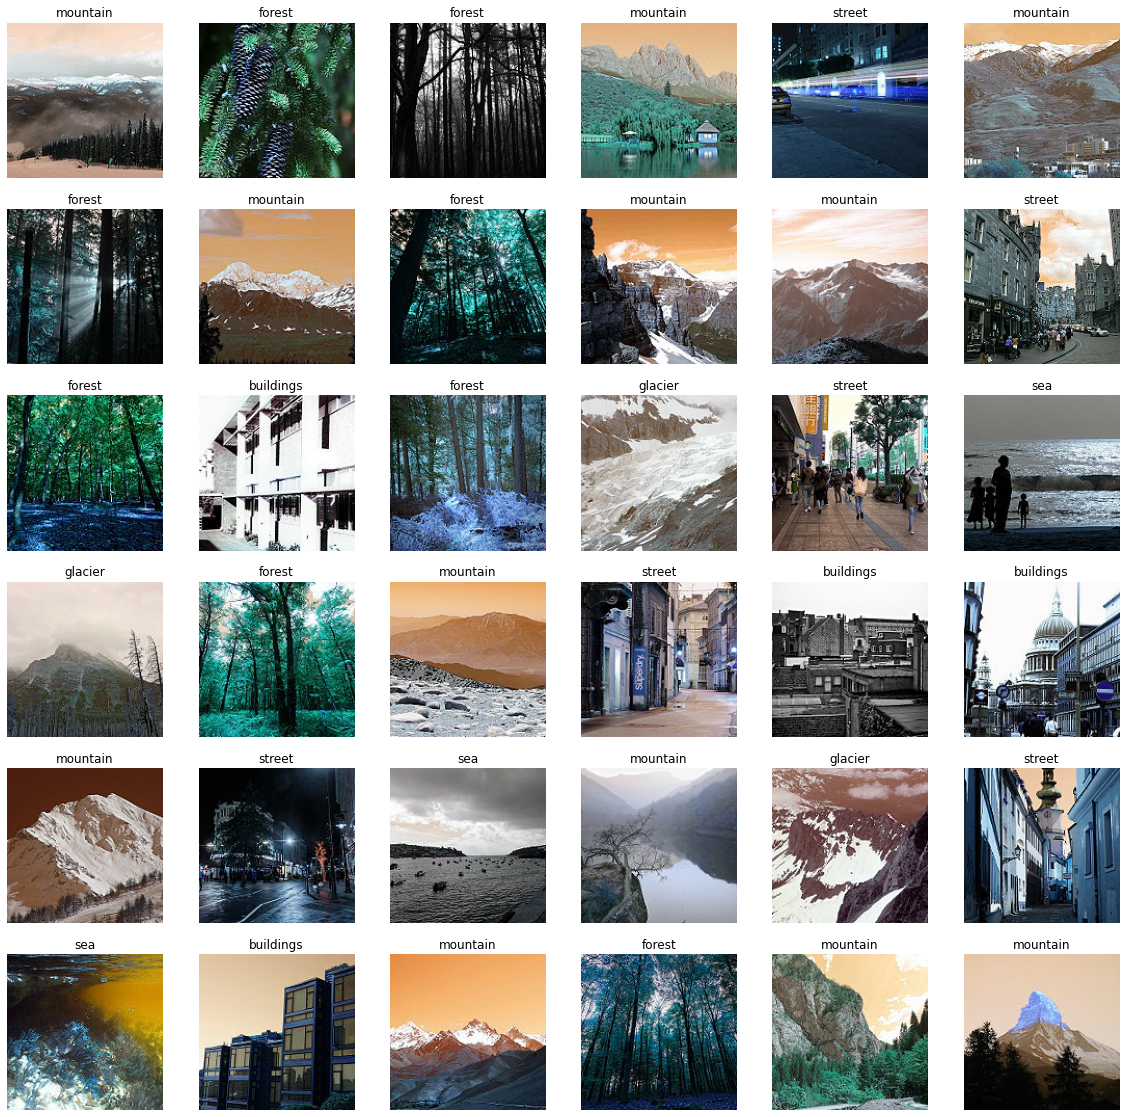

In [17]:
plt.figure(figsize=(20,20))
for a , i in enumerate(list(np.random.randint(0,len(train_images),36))) : 
    plt.subplot(6,6,a+1)
    plt.imshow(train_images[i])   
    plt.axis('off')
    plt.title(getcode(train_labels[i]))

In [18]:
test_images = []
test_labels = []


for folder in os.listdir(testpath + '\\seg_test\\'):
    files = gb.glob(pathname = str(testpath +'\\seg_test\\' + folder + '/*.jpg' ))
    for item in files:
        img = cv2.imread(item)
        img_to_array = cv2.resize(img, (150,150))
        test_images.append(list(img_to_array))
        test_labels.append(code[folder])
        
        
        

        

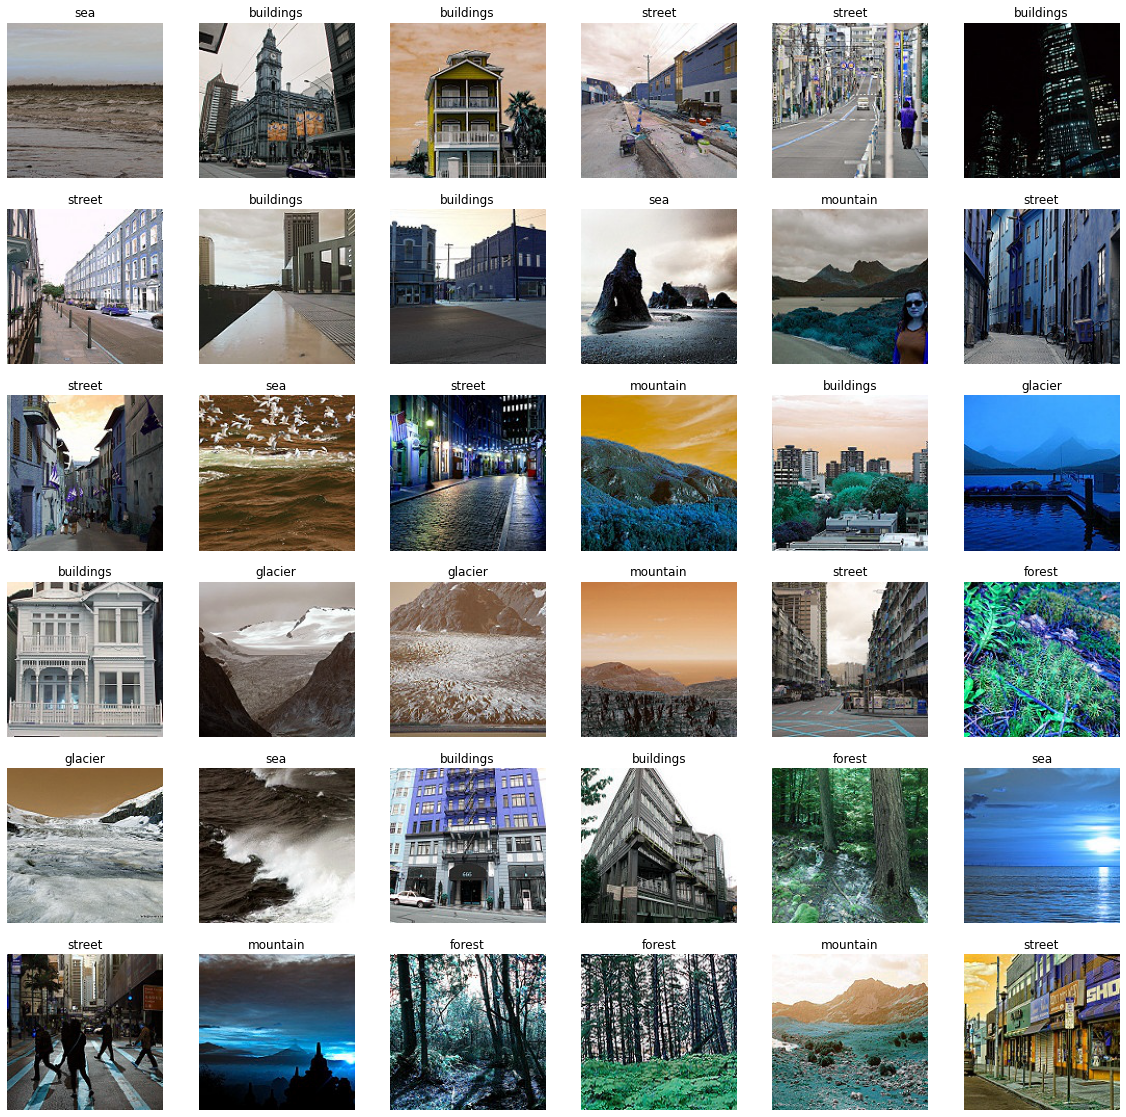

In [19]:
plt.figure(figsize=(20,20))
for a , i in enumerate(list(np.random.randint(0,len(test_images),36))) : 
    plt.subplot(6,6,a+1)
    plt.imshow(test_images[i])   
    plt.axis('off')
    plt.title(getcode(test_labels[i]))

In [ ]:
pred_images = []

for folder in os.listdir(predpath + '\\seg_pred\\'):
    files = gb.glob(pathname = str(predpath + '\\seg_pred\*.jpg'))
    for item in files:
        img = cv2.imread(item)
        img_to_array = cv2.resize(img, (150,150))
        pred_images.append(list(img_to_array))

In [ ]:
plt.figure(figsize=(20,20))
for a , i in enumerate(list(np.random.randint(0,len(pred_images),36))) : 
    plt.subplot(6,6,a+1)
    plt.imshow(pred_images[i])   
    plt.axis('off')

In [21]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)



(14034, 150, 150, 3)
(14034,)
(3000, 150, 150, 3)
(3000,)


In [45]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.4,
                                  height_shift_range = 0.4,
                                  shear_range = 0.4,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.5)


train_generator = train_datagen.flow(train_images,
                                    train_labels,
                                     batch_size = 20,
                                     shuffle = True)

test_datagen = ImageDataGenerator(rescale = 1.0/ 255.0
                                   )

test_generator = test_datagen.flow(test_images, 
                                   test_labels, 
                                   batch_size = 20)

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape = (150, 150, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(16, (3,3), input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 20736)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [48]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
             metrics = ['accuracy']
             )

In [49]:
model.fit(train_generator,
         epochs = 20,
         validation_data = test_generator,
         verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 702 steps, validate for 150 steps
Epoch 1/20
702/702 [==============================] - 351s 499ms/step - loss: 1.4580 - accuracy: 0.4746 - val_loss: 1.6183 - val_accuracy: 0.4773
Epoch 2/20
702/702 [==============================] - 342s 487ms/step - loss: 1.1308 - accuracy: 0.5686 - val_loss: 0.8903 - val_accuracy: 0.6653
Epoch 3/20
702/702 [==============================] - 342s 488ms/step - loss: 1.0682 - accuracy: 0.6014 - val_loss: 0.9733 - val_accuracy: 0.6550
Epoch 4/20
702/702 [==============================] - 341s 486ms/step - loss: 1.0379 - accuracy: 0.6156 - val_loss: 0.9698 - val_accuracy: 0.6490
Epoch 5/20
702/702 [==============================] - 379s 540ms/step - loss: 1.0080 - accuracy: 0.6293 - val_loss: 0.9594 - val_accuracy: 0.6473
Epoch 6/20
702/702 [==============================] - 344s 490ms/step - loss: 1.0037 - accuracy: 0.6398 - val_loss: 0.9567 - val_accuracy: 0.6797
Epoch 7/20
702/702 [==========

In [ ]:
model.predict(pred_images)